In [1]:
import sys
sys.path.append('../../functions')

import matplotlib.pyplot as plt
import glob
from output_funcs import openFile
from output_funcs import ODea, NC, NCM2
from output_funcs import PrevalenceTheoryM1,PrevalenceTheoryM2, PrevalenceTheoryM3
from output_funcs import RoI_fluctuationsM1M3, RoI_fluctuationsM2
from plots_funcs import RoI_figures
from stats_funcs import variance_simulations, variance_theory


# Parameter Values

In [2]:
param_all = {'repeats': 500,
            'T': 500, 
            'BT': 300,
            'p': 1/500,
            'ST': 0}

In [3]:
parametersEm = {'beta0': 0.12, 
               'gamma':0.2,
                'I0': [0,0,0], 
               'nu': 0.001,
               'mu': 0,
               'p_0': 0,
               'psign': 1,
               'BW': 30,
               'N':100000}
parametersExt = {'beta0': 1, 
               'gamma':0.2,
                'I0': [0.2,0,0], 
               'nu': 0,
               'mu': 0,
               'p_0': 0,
               'psign': -1,
                'BW': 30,
                'N': 10000}
parametersVacc = {'beta0': 1, 
               'gamma':0.18,
                'I0':  [0.2, 0.8, 0,0,0], 
               'nu': 0,
               'mu': 0.02,
               'p_0': 0,
               'psign': 0,
                 'BW':30,
                 'N':10000}

# Files

In [4]:
files = glob.glob('../data/dataHPC/*')


In [5]:
emFiles = [file for file in files if 'emergence' in file]
extFiles = [file for file in files if '500' in file]
vaccFiles = [file for file in files if 'vacc' in file]


# Results

In [6]:
EmResults = openFile(filePath = [file for file in emFiles if 'Em_' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersEm['beta0'],
                     gamma=parametersEm['gamma'],
                     nu=parametersEm['nu'],
                     mu=parametersEm['mu'],
                     p0=parametersEm['p_0'],
                     p = param_all['p'],
                     Initial=parametersEm['I0'],
                     sign =parametersEm['psign'],
                     TYPE='Ext',
                     functionPrev=PrevalenceTheoryM3,
                     functionInc=NC,
                     functionOdea= ODea)
FixResults = openFile(filePath = [file for file in emFiles if 'Fix' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersEm['beta0'],
                     gamma=parametersEm['gamma'],
                     nu=parametersEm['nu'],
                     mu=parametersEm['mu'],
                     p0=parametersEm['p_0'],
                     p = param_all['p'],
                     Initial=parametersEm['I0'],
                     sign =parametersEm['psign'],
                     TYPE='Fix',
                     functionPrev=PrevalenceTheoryM3,
                     functionInc=NC,
                     functionOdea= ODea)

In [7]:
ExtResults = openFile(filePath = [file for file in extFiles if 'Ext' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersExt['beta0'],
                     gamma=parametersExt['gamma'],
                     nu=parametersExt['nu'],
                     mu=parametersExt['mu'],
                     p0=parametersExt['p_0'],
                     p = param_all['p'],
                     Initial=parametersExt['I0'],
                     sign =parametersExt['psign'],
                     TYPE='Ext',
                     functionPrev=PrevalenceTheoryM1,
                     functionInc=NC)
FixResults = openFile(filePath = [file for file in extFiles if 'Fix' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersExt['beta0'],
                     gamma=parametersExt['gamma'],
                     nu=parametersExt['nu'],
                     mu=parametersExt['mu'],
                     p0=parametersExt['p_0'],
                     p = param_all['p'],
                     Initial=parametersExt['I0'],
                     sign =parametersExt['psign'],
                     TYPE='Fix',
                     functionPrev=PrevalenceTheoryM1,
                     functionInc=NC)

In [8]:
VaccResults = openFile(filePath = [file for file in vaccFiles if 'Ext' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersVacc['beta0'],
                     gamma=parametersVacc['gamma'],
                     nu=parametersVacc['nu'],
                     mu=parametersVacc['mu'],
                     p0=parametersVacc['p_0'],
                     p = param_all['p'],
                     Initial=parametersVacc['I0'],
                     sign =parametersVacc['psign'],
                     TYPE='Ext',
                     functionPrev=PrevalenceTheoryM2,
                     functionInc=NCM2)
FixResults = openFile(filePath = [file for file in vaccFiles if 'Fix' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersVacc['beta0'],
                     gamma=parametersVacc['gamma'],
                     nu=parametersVacc['nu'],
                     mu=parametersVacc['mu'],
                     p0=parametersVacc['p_0'],
                     p = param_all['p'],
                     Initial=parametersVacc['I0'],
                     sign =parametersVacc['psign'],
                     TYPE='Fix',
                     functionPrev=PrevalenceTheoryM2,
                     functionInc=NCM2)

# Plots

In [9]:
stat = 'variance'
extension = '.pdf'
figwidth = 5.7


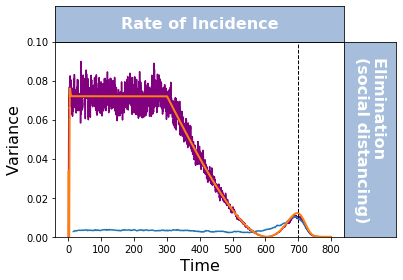

In [10]:
r0_1_t = (parametersExt['psign']*parametersExt['gamma']/parametersExt['beta0']+1)/param_all['p'] + param_all['BT']
fig, ax = plt.subplots(1, figsize = (figwidth,4))
RoI_figures(results_dict=ExtResults,
            param_dict=parametersExt,
            model_no=1,
            theory_func=RoI_fluctuationsM1M3,
            RUN='Ext',
            statistical_func_simulation=variance_simulations,
            statistical_func_theory=variance_theory,
            ax=ax,
            data_type = 'Figure 2',
            param_all=param_all,
            r0_1_t=r0_1_t, 
            text_col='white',
               border_col='#a6bddb')
ax.set_ylim([0,0.1])
# ax.legend(ncol =2, fontsize = 13)
ax.set_ylabel('Variance', fontsize = 16)
ax.set_xlabel('Time', fontsize=16)
fig.tight_layout()
fig.savefig('../figures/'+extension[1:]+'/'+stat+'RoI_M1'+extension)

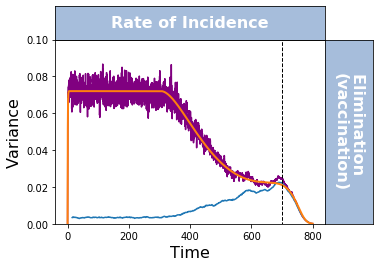

In [11]:
fig, ax = plt.subplots(1, figsize = (figwidth,4))
RoI_figures(results_dict=VaccResults,
            param_dict=parametersVacc,
            model_no=2,
            theory_func=RoI_fluctuationsM2,
            RUN='Ext',
            statistical_func_simulation=variance_simulations,
            statistical_func_theory=variance_theory,
            ax=ax,
            data_type = 'Figure 2',
            param_all=param_all,
            r0_1_t=r0_1_t,
            text_col='white',
               border_col='#a6bddb')
ax.set_ylim([0,0.1])
# ax.legend(ncol =2, fontsize = 13)
ax.set_ylabel('Variance', fontsize = 16)
ax.set_xlabel('Time', fontsize=16)
fig.savefig('../figures/'+extension[1:]+'/'+stat+'RoI_M2'+extension)

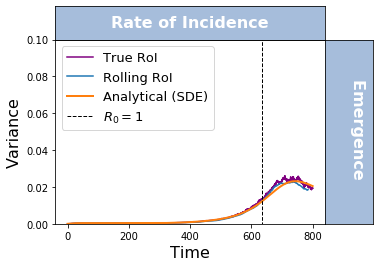

In [12]:
r0_1_t = (parametersEm['gamma']/parametersEm['beta0']-1)/param_all['p'] + param_all['BT']
fig, ax = plt.subplots(1, figsize = (figwidth,4))
RoI_figures(results_dict=EmResults,
            param_dict=parametersEm,
            model_no=3,
            theory_func=RoI_fluctuationsM1M3,
            RUN='Ext',
            statistical_func_simulation=variance_simulations,
            statistical_func_theory=variance_theory,
            ax=ax,
            data_type = 'Figure 2',
            param_all=param_all,
            r0_1_t=r0_1_t, 
            text_col='white',
               border_col='#a6bddb')
ax.set_ylim([0,0.1])
ax.legend(fontsize = 13)
ax.set_ylabel('Variance', fontsize = 16)
ax.set_xlabel('Time', fontsize=16)
# ax.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
fig.savefig('../figures/'+extension[1:]+'/'+stat+'RoI_M3'+extension)